In [2]:
from ggpoker_client import AoF_Client
import time
import mss
import pyautogui
import cv2
from functools import wraps
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import json


### Image processing

In [12]:


img2 = cv2.imread("assets/bet_amount_2.png",cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("assets/bet_amount_3.png",cv2.IMREAD_GRAYSCALE)

ref2 = cv2.imread("../../bet_amount_2_ref.png",cv2.IMREAD_GRAYSCALE)
ref3 = cv2.imread("../../bet_amount_3_ref.png",cv2.IMREAD_GRAYSCALE)


In [17]:
#show image in notebook
def show_image(img):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.show()


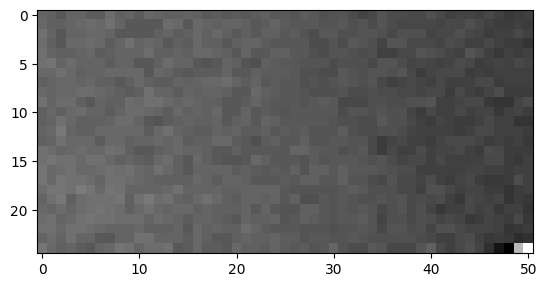

In [23]:
show_image(img3)

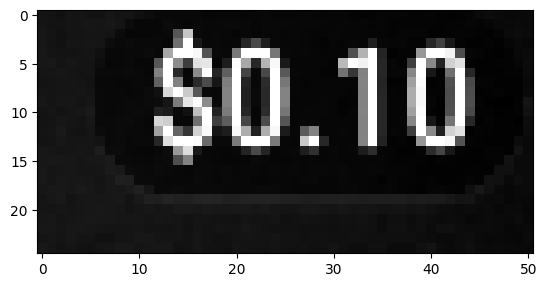

In [24]:
show_image(ref3)

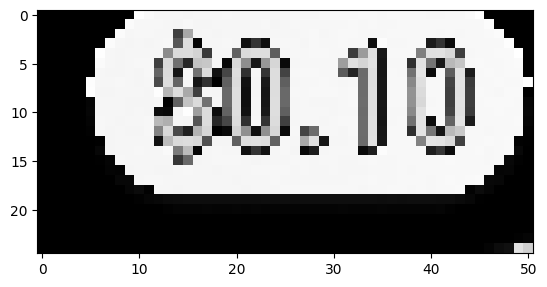

In [25]:
show_image(ref3-img3)

### Test Model querying

In [27]:
from bot import Query, AoFModel

from poker_ai.poker.card import Card

In [28]:
def df_model(agent):
    df=pd.DataFrame(index=agent.keys(), data=agent.values())
    i=pd.DataFrame([json.loads(x) for x in df.index])
    df.reset_index(drop=True, inplace=True)
    df= pd.concat([df,i], axis=1)
    i=df.pop("history").apply(lambda x:  pd.Series(x))
    i.fillna({}, inplace=True)
    i=pd.concat([pd.json_normalize(i[n]) for n in i.columns], axis=1)
    i.fillna("", inplace=True)
    df=df.join(i)

    return df

In [29]:
model= AoFModel(path_model="models/aof_cumm_round_5.joblib")


In [32]:
df=df_model(model.model)

/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [36]:
df[(df["cards_cluster"]==70)]

,fold,all-in,n_players,cards_cluster,portion_bet,pre_flop
139,7.224712e-110,4.000000e+00,2,70,0.1,[raise]
140,1.404379e-54,4.000000e+00,2,70,0.3,[raise]
141,4.000000e+00,2.152074e-31,2,70,0.5,
142,5.144419e-56,4.000000e+00,2,70,0.5,[raise]
143,7.219406e-35,4.000000e+00,2,70,0.7,[raise]
...,...,...,...,...,...,...
2057,2.406977e-69,1.600000e+01,4,70,0.7,"[raise, fold, raise]"
2058,3.257489e-70,1.600000e+01,4,70,0.7,"[raise, fold]"
2059,4.499329e+00,1.150067e+01,4,70,0.7,"[raise, raise, fold]"
2060,2.061154e-09,1.600000e+01,4,70,0.7,"[raise, raise, raise]"


In [17]:
model.model['{"n_players":2,"cards_cluster":70,"portion_bet":0.1,"history":[]}']

KeyError: '{"n_players":2,"cards_cluster":70,"portion_bet":0.1,"history":[]}'

### Combine models

In [5]:
import joblib
from pathlib import Path

In [3]:
def get_model_strategy(model_path: str):
    with open(model_path, "rb") as input_file:
        a = joblib.load(input_file)
    return a["strategy"]

In [8]:
from asyncore import poll3


p2 = Path("../../aof_sit_go_2p_rankroud_5_cumm_strat_2022_10_01_14_53_53_166506/agent.joblib")
p3 = Path("../../aof_sit_go_3p_rankroud_5_cumm_strat_2022_10_01_15_02_47_783645/agent.joblib")
p4 = Path("../../aof_sit_go_4p_rankroud_5_cumm_strat_2022_10_01_18_49_52_111879/agent.joblib")

In [9]:
d2 = get_model_strategy(p2)
d3 = get_model_strategy(p3)
d4 = get_model_strategy(p4)

In [12]:
aof_model_cumm= {**d2, **d3, **d4}

In [13]:
joblib.dump(aof_model_cumm, "models/aof_cumm_round_5.joblib")

['models/aof_cumm_round_5.joblib']

### Measure time for mss vs pyautogui

Function took 0.3450 seconds


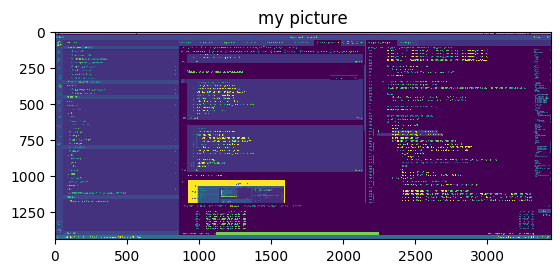

In [20]:
# time pyautogui.screenshot()
start_time = time.perf_counter()
img=np.array(pyautogui.screenshot())
img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
assert type(img) == np.ndarray
end_time = time.perf_counter()
total_time = end_time - start_time
print(f'Function took {total_time:.4f} seconds')
plt.imshow(img)
plt.title('my picture')
plt.show()

Function took 0.0427 seconds


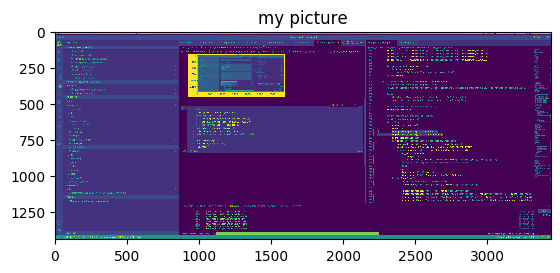

In [21]:
#time mss
start_time = time.perf_counter()
with mss.mss() as sct:
    img = np.array(sct.grab(sct.monitors[1]))
    img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    assert type(img) == np.ndarray
end_time = time.perf_counter()
total_time = end_time - start_time
print(f'Function took {total_time:.4f} seconds')

plt.imshow(img)
plt.title('my picture')
plt.show()

{'left': 0, 'top': 0, 'width': 3440, 'height': 1440}


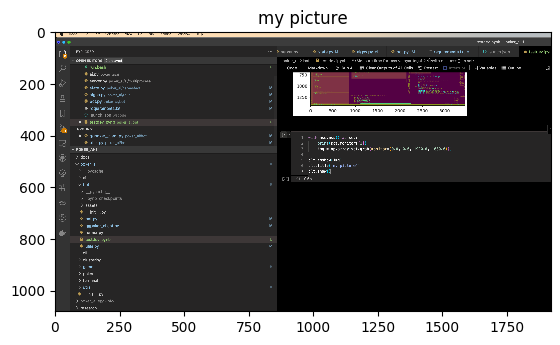

In [24]:
with mss.mss() as sct:
    print(sct.monitors[1])
    img = np.array(sct.grab(monitor=(0.0, 0.0, 1920.0, 1080.0)))

plt.imshow(img)
plt.title('my picture')
plt.show()